In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import pylab as pl 
import numpy as np 
from sklearn import linear_model 

In [3]:
df = pd.read_csv("FuelConsumption.csv") 
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


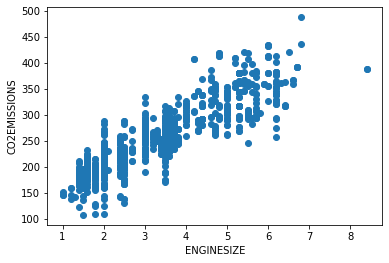

<Figure size 1008x504 with 0 Axes>

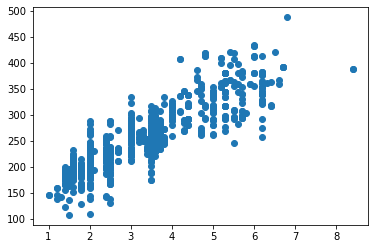

<Figure size 1008x504 with 0 Axes>

Coefficients of the model: [[10.13434741  8.04462122 -2.22813517 -1.41085674 13.46580841]]
7.523324709841024


In [8]:
cdf  =  df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']] 
cdf 

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS) 
plt.xlabel("ENGINESIZE") 
plt.ylabel("CO2EMISSIONS") 
plt.figure(figsize=(14,7)) 
plt.show()  

msk = np.random.rand(len(df)) < 0.8 
train = cdf[msk] 
test =  cdf[~msk]  

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS) 
plt.figure(figsize=(14,7)) 
plt.show()  

reg = linear_model.LinearRegression() 
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]) 
y = np.asanyarray(train[['CO2EMISSIONS']])  

reg.fit(x, y) 
print('Coefficients of the model:', reg.coef_)  
y_pred = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]) 
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]) 
y = np.asanyarray(test[['CO2EMISSIONS']])  
RSS = np.mean(y_pred - y)**2 
print(RSS) 